# Task 1 Solution
  Linear Regression to predict the percentage of marks of an student based on the number of study hours. 
  This is a simple linear regression task as it involves just 2 variables. Here I have used Jupyter Notebook IDE.
  

### Q. To predict the score if a student studies for 9.25 hrs/ day

## Solution by Vishnu Derkar

In [66]:
# import all the relevant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
%matplotlib inline

In [5]:
#import the given data from url to Pandas Dataframe format.
url = "http://bit.ly/w-data"
study_data = pd.read_csv(url) 

# or you can load the data from device using
# study_data = pd.read_csv("<Location of the csv file>")


In [7]:
# to check if the data is loaded correctly we use .head() function
study_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Visualization

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

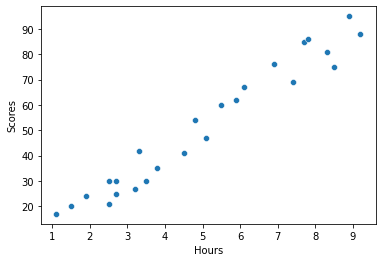

In [14]:
#Here we used seaborn library to visualize the given data
sns.scatterplot(data=study_data, x='Hours',y='Scores')

##### Here it can be clearly seen that there exist a linear relationship between the Scores and number of hours studied per day so we use Linear Regression here.

## Data Preparation

In [22]:
# Let's check for any missing data
study_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Here don't have any missing data. Now let's divide data into Traning Set and Test Set 

In [23]:
# X is the train variable set and Y is test variable set 
X = study_data.iloc[:, :-1].values  
Y = study_data.iloc[:, 1].values  

# it can also be done in this way

#x = study['Hour']
#y = study['Scores']

In [45]:
# here i will split the data into training data and testing data
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size=0.2, random_state=0)

# Training the model

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
res = regressor.fit(train_x,train_y) 

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

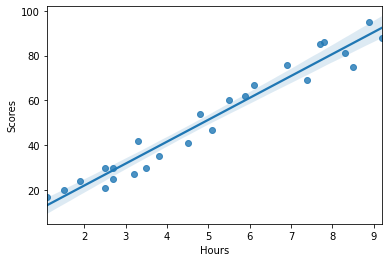

In [47]:
# From seaborn library we use regplot() function to visualize the regression line
sns.regplot(data=study_data, x='Hours',y='Scores')

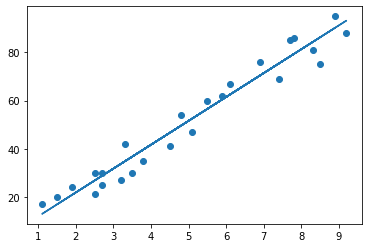

In [48]:
# Plotting the regression line using metplotlib
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

## Comparision of Predicted values and Actual values

In [49]:
# Predicting using test data
predict_y = regressor.predict(test_x)

# Saving actual and Predicted data in DataFrame format

Pred_act = pd.DataFrame({"Actual":test_y,"Predicted":predict_y})
Pred_act.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Considering the number of instances we have trained our data on, the predictions are pretty close

In [51]:
# You can also test with your own data
hours = np.array(9.25).reshape(1,-1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating our Model

In this final step we have evaluate our model.

In [68]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predict_y))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predict_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predict_y)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [39]:
regressor.score(X,Y)

0.9520457651718771